## 1) simple_linear_regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/auto-mpg.csv", header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [6]:
df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

In [7]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
ndf

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0
...,...,...,...,...
393,27.0,4,86.0,2790.0
394,44.0,4,52.0,2130.0
395,32.0,4,84.0,2295.0
396,28.0,4,79.0,2625.0


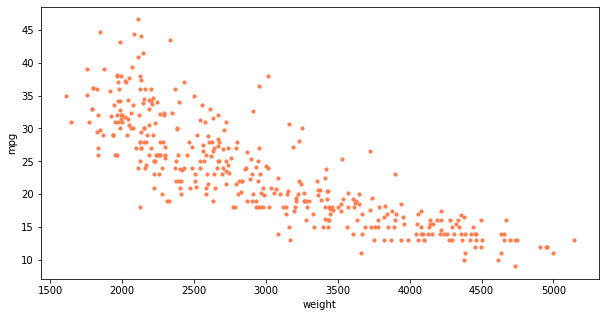

In [9]:
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))
plt.show()
plt.close()

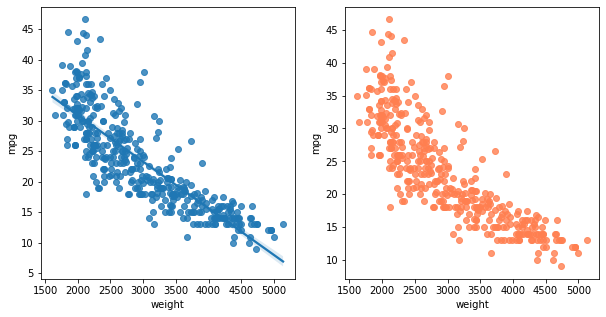

In [10]:
fig, (ax1, ax2) = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False, color='coral')
plt.show()
plt.close()

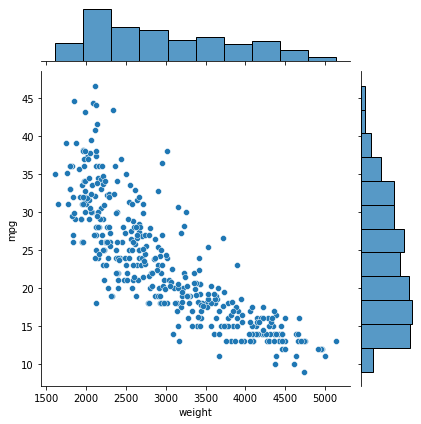

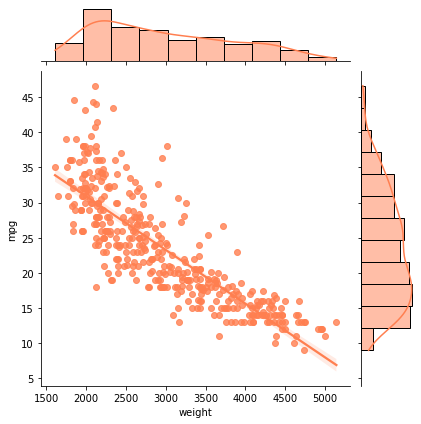

In [11]:
sns.jointplot(x='weight', y='mpg', data=ndf)
sns.jointplot(x='weight', y='mpg', data=ndf, kind='reg', color='coral')
plt.show()
plt.close()

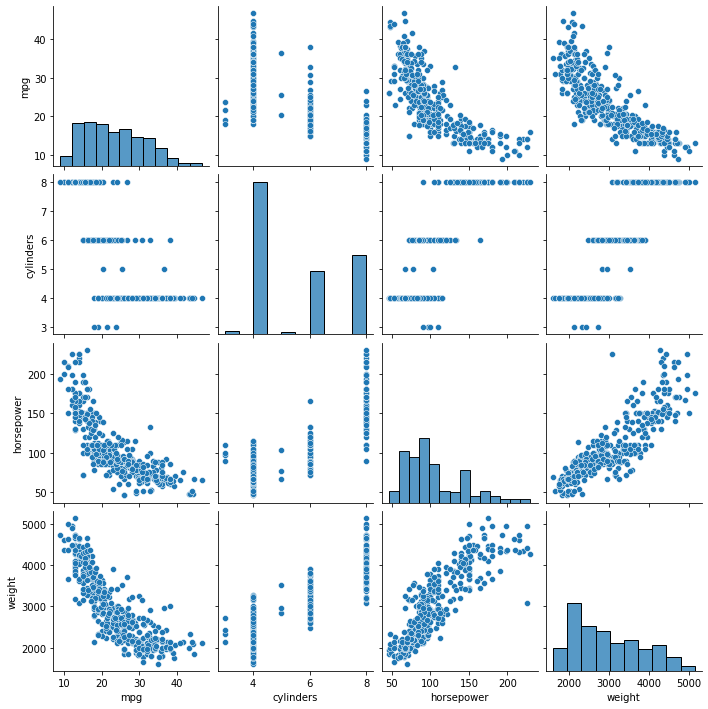

In [12]:
sns.pairplot(ndf)
plt.show()
plt.close()

In [13]:
x = ndf[['weight']]
y = ndf['mpg']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_train.shape, x_test.shape

((274, 1), (118, 1))

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

r_square = lr.score(x_test, y_test)
r_square

0.665347901876567

In [15]:
lr.coef_

array([-0.00798478])

In [16]:
lr.intercept_

47.48403337907169

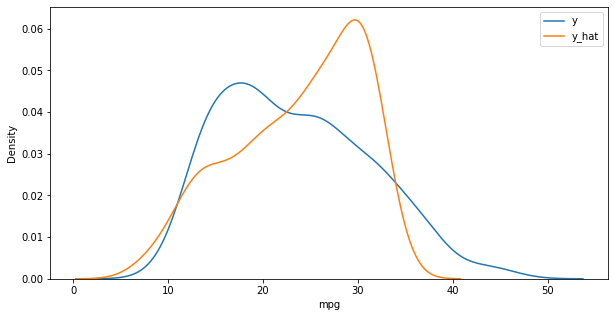

In [17]:
y_hat = lr.predict(x)

fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(y, label='y', ax=ax)
sns.kdeplot(y_hat, label='y_hat', ax=ax)

plt.legend()
plt.show()
plt.close()

## 2) polynomial_regression

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name'] 

df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

X=ndf[['weight']]
y=ndf['mpg']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print(x_train.shape, x_test.shape)

(274, 1) (118, 1)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [20]:
poly = PolynomialFeatures(degree=2)  # The degree of the polynomial features. Default = 2.
x_train_poly = poly.fit_transform(x_train)
x_train_poly.shape

(274, 3)

In [21]:
pr = LinearRegression()
pr.fit(x_train_poly, y_train)

LinearRegression()

In [22]:
x_test_poly = poly.fit_transform(x_test)
r_square = pr.score(x_test_poly, y_test)
r_square

0.708700926297548

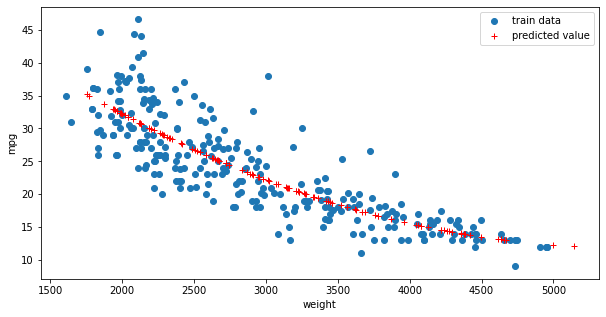

In [23]:
y_hat_test = pr.predict(x_test_poly)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x_train, y_train, 'o', label='train data')
ax.plot(x_test, y_hat_test, 'r+', label='predicted value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

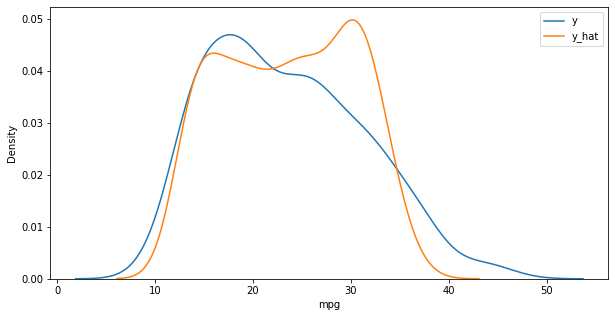

In [24]:
x_poly = poly.fit_transform(x)
y_hat = pr.predict(x_poly)

fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(y, label='y', ax=ax)
sns.kdeplot(y_hat, label='y_hat', ax=ax)
plt.legend()
plt.show()
plt.close()

## 3) multivariate_regression

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name'] 

df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

X=ndf[['cylinders', 'horsepower', 'weight']]
y=ndf['mpg']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print(x_train.shape, x_test.shape)

(274, 3) (118, 3)


In [26]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

r_square = lr.score(x_test, y_test)
r_square

0.6939048496695599

In [27]:
lr.coef_

array([-0.60691288, -0.03714088, -0.00522268])

In [28]:
lr.intercept_

46.414351269634025

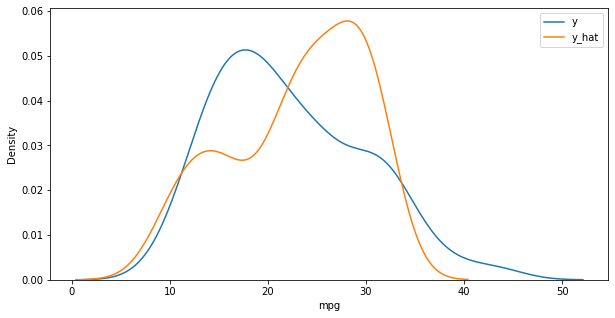

In [29]:
y_hat = lr.predict(x_test)

fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(y_test, label='y', ax=ax)
sns.kdeplot(y_hat, label='y_hat', ax=ax)
plt.legend()
plt.show()
plt.close()